# Exploratory Data Analysis

Inspiration and some of the parts came from: Python Data Science [GitHub repository](https://github.com/jakevdp/PythonDataScienceHandbook/tree/master), [MIT License](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/LICENSE-CODE) and [Introduction to Pandas](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb) by Google, [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0)

If running this from Google Colab, uncomment the cell below and run it. Otherwise, just skip it.

In [1]:
#!pip install seaborn
#!pip install watermark

In [9]:
import pandas as pd
import seaborn as sns
from scipy import stats

## Learning Objectives:

 * descriptive statistics/EDA
 * corr matrix

For this notebook, we will use the california housing dataframes.

In [5]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


## Exploring Data

As shown above, after loading a large `DataFrame`, it may be a bit hard to have a good overview of what is inside it just by looking at a few rows. Thus, the `DataFrame.describe` method is useful to show interesting statistics about a `DataFrame`.

In [6]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`. You can give it a number of rows to display.

In [7]:
california_housing_dataframe.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


Or `DataFrame.tail`, which displays the last few records of a `DataFrame`:

In [8]:
california_housing_dataframe.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


## Correletaion Matrix

Consider the table of measurements below.

In [23]:
blobs_statistics = pd.read_csv('../../data/blobs_statistics.csv', index_col=0)
blobs_statistics.head()

,area,mean_intensity,minor_axis_length,major_axis_length,eccentricity,extent,feret_diameter_max,equivalent_diameter_area,bbox-0,bbox-1,bbox-2,bbox-3
0,422,192.379147,16.488550,34.566789,0.878900,0.586111,35.227830,23.179885,0,11,30,35
1,182,180.131868,11.736074,20.802697,0.825665,0.787879,21.377558,15.222667,0,53,11,74
2,661,205.216339,28.409502,30.208433,0.339934,0.874339,32.756679,29.010538,0,95,28,122
3,437,216.585812,23.143996,24.606130,0.339576,0.826087,26.925824,23.588253,0,144,23,167
4,476,212.302521,19.852882,31.075106,0.769317,0.863884,31.384710,24.618327,0,237,29,256


After measuring many features / properties, it is often common that some of them are strongly correlated and may not bring much new information. In pandas, we can calculate correlation among columns like this.

In [24]:
blobs_statistics.corr()


,area,mean_intensity,minor_axis_length,major_axis_length,eccentricity,extent,feret_diameter_max,equivalent_diameter_area,bbox-0,bbox-1,bbox-2,bbox-3
area,1.000000,0.548612,0.890649,0.895282,-0.192147,-0.267454,0.916652,0.975964,-0.066508,-0.081937,0.034083,-0.003961
mean_intensity,0.548612,1.000000,0.657131,0.440678,-0.362592,-0.011555,0.487183,0.611103,0.015188,0.217484,0.069184,0.266504
minor_axis_length,0.890649,0.657131,1.000000,0.664507,-0.566486,-0.037872,0.716706,0.937795,-0.163017,-0.056785,-0.077817,0.015790
major_axis_length,0.895282,0.440678,0.664507,1.000000,0.168454,-0.551362,0.995196,0.880909,-0.010743,-0.128821,0.093556,-0.057776
eccentricity,-0.192147,-0.362592,-0.566486,0.168454,1.000000,-0.432629,0.103529,-0.272402,0.257938,-0.060467,0.253671,-0.076793
extent,-0.267454,-0.011555,-0.037872,-0.551362,-0.432629,1.000000,-0.517428,-0.278453,-0.076688,0.048511,-0.128149,0.019310
feret_diameter_max,0.916652,0.487183,0.716706,0.995196,0.103529,-0.517428,1.000000,0.911211,-0.025173,-0.122607,0.080054,-0.049283
equivalent_diameter_area,0.975964,0.611103,0.937795,0.880909,-0.272402,-0.278453,0.911211,1.000000,-0.107059,-0.096706,-0.004660,-0.018489
bbox-0,-0.066508,0.015188,-0.163017,-0.010743,0.257938,-0.076688,-0.025173,-0.107059,1.000000,0.050957,0.993418,0.053563
bbox-1,-0.081937,0.217484,-0.056785,-0.128821,-0.060467,0.048511,-0.122607,-0.096706,0.050957,1.000000,0.032728,0.996062


It can be hard to read in numeric format. I wonder if there is beter way how to look at the data?

Below we take a quick shortcut to seaborn to show how the correlation can be displayed as a heatmap.

<Axes: >

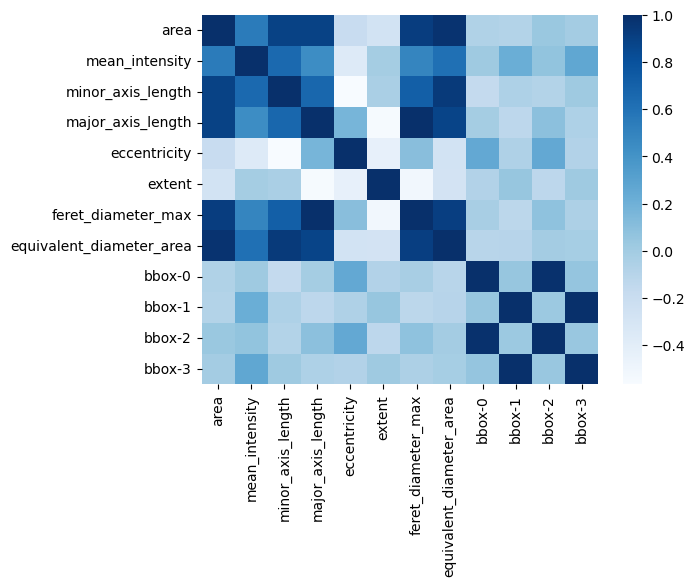

In [25]:
# calculate the correlation matrix on the numeric columns
corr = blobs_statistics.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr, cmap="Blues", annot=False)

**Watermark**

In [15]:
from watermark import watermark
watermark(iversions=True, globals_=globals())
print(watermark())
print(watermark(packages="watermark,numpy,pandas,seaborn,pivottablejs"))

Last updated: 2023-08-24T14:26:10.347260+02:00

Python implementation: CPython
Python version       : 3.9.17
IPython version      : 8.14.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 16
Architecture: 64bit

watermark   : 2.4.3
numpy       : 1.23.5
pandas      : 2.0.3
seaborn     : 0.12.2
pivottablejs: 0.9.0

